In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [3]:
df.shape

(140700, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

#### Check Duplicates

In [5]:
df.duplicated().sum()

0

In [6]:
cols_te_drop = ['id', 'Name', 'City', 'Profession', 'CGPA', 'Degree']

In [7]:
df = df.drop(columns = cols_te_drop, axis = 1)

In [8]:
df[['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction']]

,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction
0,NaN,5.0,NaN,2.0
1,NaN,4.0,NaN,3.0
2,5.0,NaN,2.0,NaN
3,NaN,5.0,NaN,1.0
4,NaN,1.0,NaN,1.0
...,...,...,...,...
140695,NaN,5.0,NaN,4.0
140696,NaN,5.0,NaN,4.0
140697,NaN,3.0,NaN,1.0
140698,NaN,5.0,NaN,2.0


In [9]:
def Col_merge(df,
              col1 = 'Academic Pressure',
              col2 = 'Work Pressure',
              col3 = 'Study Satisfaction',
              col4 = 'Job Satisfaction',
              pair1 = True,
              pair2 = True):
    '''
    This function combines Study and Work Pressure/Satisfaction into one column
    '''
   
    if pair1:
        df['Academic_Work_Pressure'] = np.maximum(df[col1].fillna(-np.inf), df[col2].fillna(-np.inf)).replace(-np.inf, np.nan)
        df = df.drop(columns = ['Work Pressure', 'Academic Pressure'], axis = 1)
        
    if pair2:
        df['Study_Job_Satisfactione'] = np.maximum(df[col3].fillna(-np.inf), df[col4].fillna(-np.inf)).replace(-np.inf, np.nan)
        df = df.drop(columns = ['Job Satisfaction', 'Study Satisfaction'], axis = 1)
            
    return df


In [10]:
df = Col_merge(df)
df.head()

,Gender,Age,Working Professional or Student,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Academic_Work_Pressure,Study_Job_Satisfactione
0,Female,49.0,Working Professional,More than 8 hours,Healthy,No,1.0,2.0,No,0,5.0,2.0
1,Male,26.0,Working Professional,Less than 5 hours,Unhealthy,Yes,7.0,3.0,No,1,4.0,3.0
2,Male,33.0,Student,5-6 hours,Healthy,Yes,3.0,1.0,No,1,5.0,2.0
3,Male,22.0,Working Professional,Less than 5 hours,Moderate,Yes,10.0,1.0,Yes,1,5.0,1.0
4,Female,30.0,Working Professional,5-6 hours,Unhealthy,Yes,9.0,4.0,Yes,0,1.0,1.0


In [11]:
for item in df.columns:
    if item == 'Age':
        pass
    else:
        print(f'{df[item].value_counts()}')

Male      77464
Female    63236
Name: Gender, dtype: int64
Working Professional    112799
Student                  27901
Name: Working Professional or Student, dtype: int64
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours        

**Gender**: There is a higher representation of males (77,464) than females (63,236). This ***imbalance*** might need attention in modeling to avoid bias, depending on the research goals.

**Profession**: "Working Professional" vastly outnumbers "Student," with 112,799 vs. 27,901. ***This might suggest a predominance of adult data points***, likely influencing analysis if work-related stress is studied.

**Sleep Duration**: This feature has multiple low-frequency and inconsistent entries (e.g., "9-5," "Pune," "than 5 hours," etc.), indicating possible data entry errors. Cleaning and grouping the durations into consistent categories (e.g., 3-4, 5-6, 7-8 hours) could enhance reliability.

**Dietary Habits**: This column contains mostly expected categories (e.g., Moderate, Unhealthy, Healthy), but a few stray entries, like "Yes," "Male," and even individual names ("Mihir"). These likely reflect errors needing correction for consistent dietary categories.

**Suicidal Thoughts**: The responses are well-organized with binary "Yes" and "No" values, showing near-equal distribution, which could indicate that this dataset captures diverse mental health experiences.

**Work/Study Hours**: Values from 0 to 12 show a nearly uniform distribution of hours. This setup suggests hours are captured as numeric, which could work well in quantitative analysis.

**Financial Stress, Family History, and Depression**: These have a balanced distribution that may make them reliable predictors in models related to mental health.

**Academic Work Pressure and Study/Job Satisfaction**: These ordinal features display a spread across ratings from 1.0 to 5.0, showing variability in pressure and satisfaction. The consistency here suggests they can be useful in modeling without much transformation.

#### Categorizing Sleep Duration with Irregular Data Handling

In [12]:
def group_sleep_hours(value):
    '''
    This function groups the original categories into more natural categorical grouping
    '''
    if value in ['Less than 5 hours', '2-3 hours', '1-3 hours', '1-2 hours']:
        return 'Low Sleep'
    elif value in ['5-6 hours', '6-7 hours', '4-5 hours', '6-8 hours', '7-8 hours', '8 hours']:
        return 'Moderate Sleep'
    elif value in ['More than 8 hours', '9-11 hours', '10-11 hours', '8-9 hours']:
        return 'High Sleep'
    else:
        return 'Other'


df['Sleep_Duration_Category'] = df['Sleep Duration'].apply(group_sleep_hours)

# Create a mapping dictionary for future use when we will have new unseen data.
mapping_sleep = dict(zip(df['Sleep Duration'], df['Sleep_Duration_Category']))

# Save the mapping_sleep dictionary to a pickle file
with open('mapping_sleep.pkl', 'wb') as f:
    pickle.dump(mapping_sleep, f)

In [13]:
# Function to group rare categories into 'Other'

def group_categories(series, main_categories):
    '''
    This function groups the incorrect caegories into 'Oher' category
    '''
    return series.apply(lambda x: x if x in main_categories else 'Other')

# Apply the grouping function 
df['Dietary_Habits_Category'] = group_categories(df['Dietary Habits'], ['Moderate', 'Unhealthy', 'Healthy'])

# Create a mapping dictionary for future use when we will have new unseen data.
mapping_diet = dict(zip(df['Dietary Habits'], df['Dietary_Habits_Category']))

# Save the mapping_diet  dictionary to a pickle file
with open('mapping_diet.pkl', 'wb') as f:
    pickle.dump(mapping_diet , f)

In [14]:
for item in ['Dietary_Habits_Category','Sleep_Duration_Category']:
    print(f'{df[item].value_counts()}')

Moderate     49705
Unhealthy    46227
Healthy      44741
Other           27
Name: Dietary_Habits_Category, dtype: int64
Moderate Sleep    69131
Low Sleep         38791
High Sleep        32732
Other                46
Name: Sleep_Duration_Category, dtype: int64


#### Check missing values

In [16]:
df.isna().sum()

Gender                                    0
Age                                       0
Working Professional or Student           0
Sleep Duration                            0
Dietary Habits                            4
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          4
Family History of Mental Illness          0
Depression                                0
Academic_Work_Pressure                   21
Study_Job_Satisfactione                  15
Sleep_Duration_Category                   0
Dietary_Habits_Category                   0
dtype: int64

The dataset has minimal missing values, with the most missing in ***Academic_Work_Pressure*** (21) and ***Study_Job_Satisfactione*** (15). These missing values should be handled through imputation or removal for accurate analysis.

In [17]:
df = df.drop(columns = ['Dietary Habits', 'Sleep Duration'], axis = 1)

#### The Distribution of The Target Feature.

In [18]:
df['Depression'].value_counts()

0    115133
1     25567
Name: Depression, dtype: int64

''

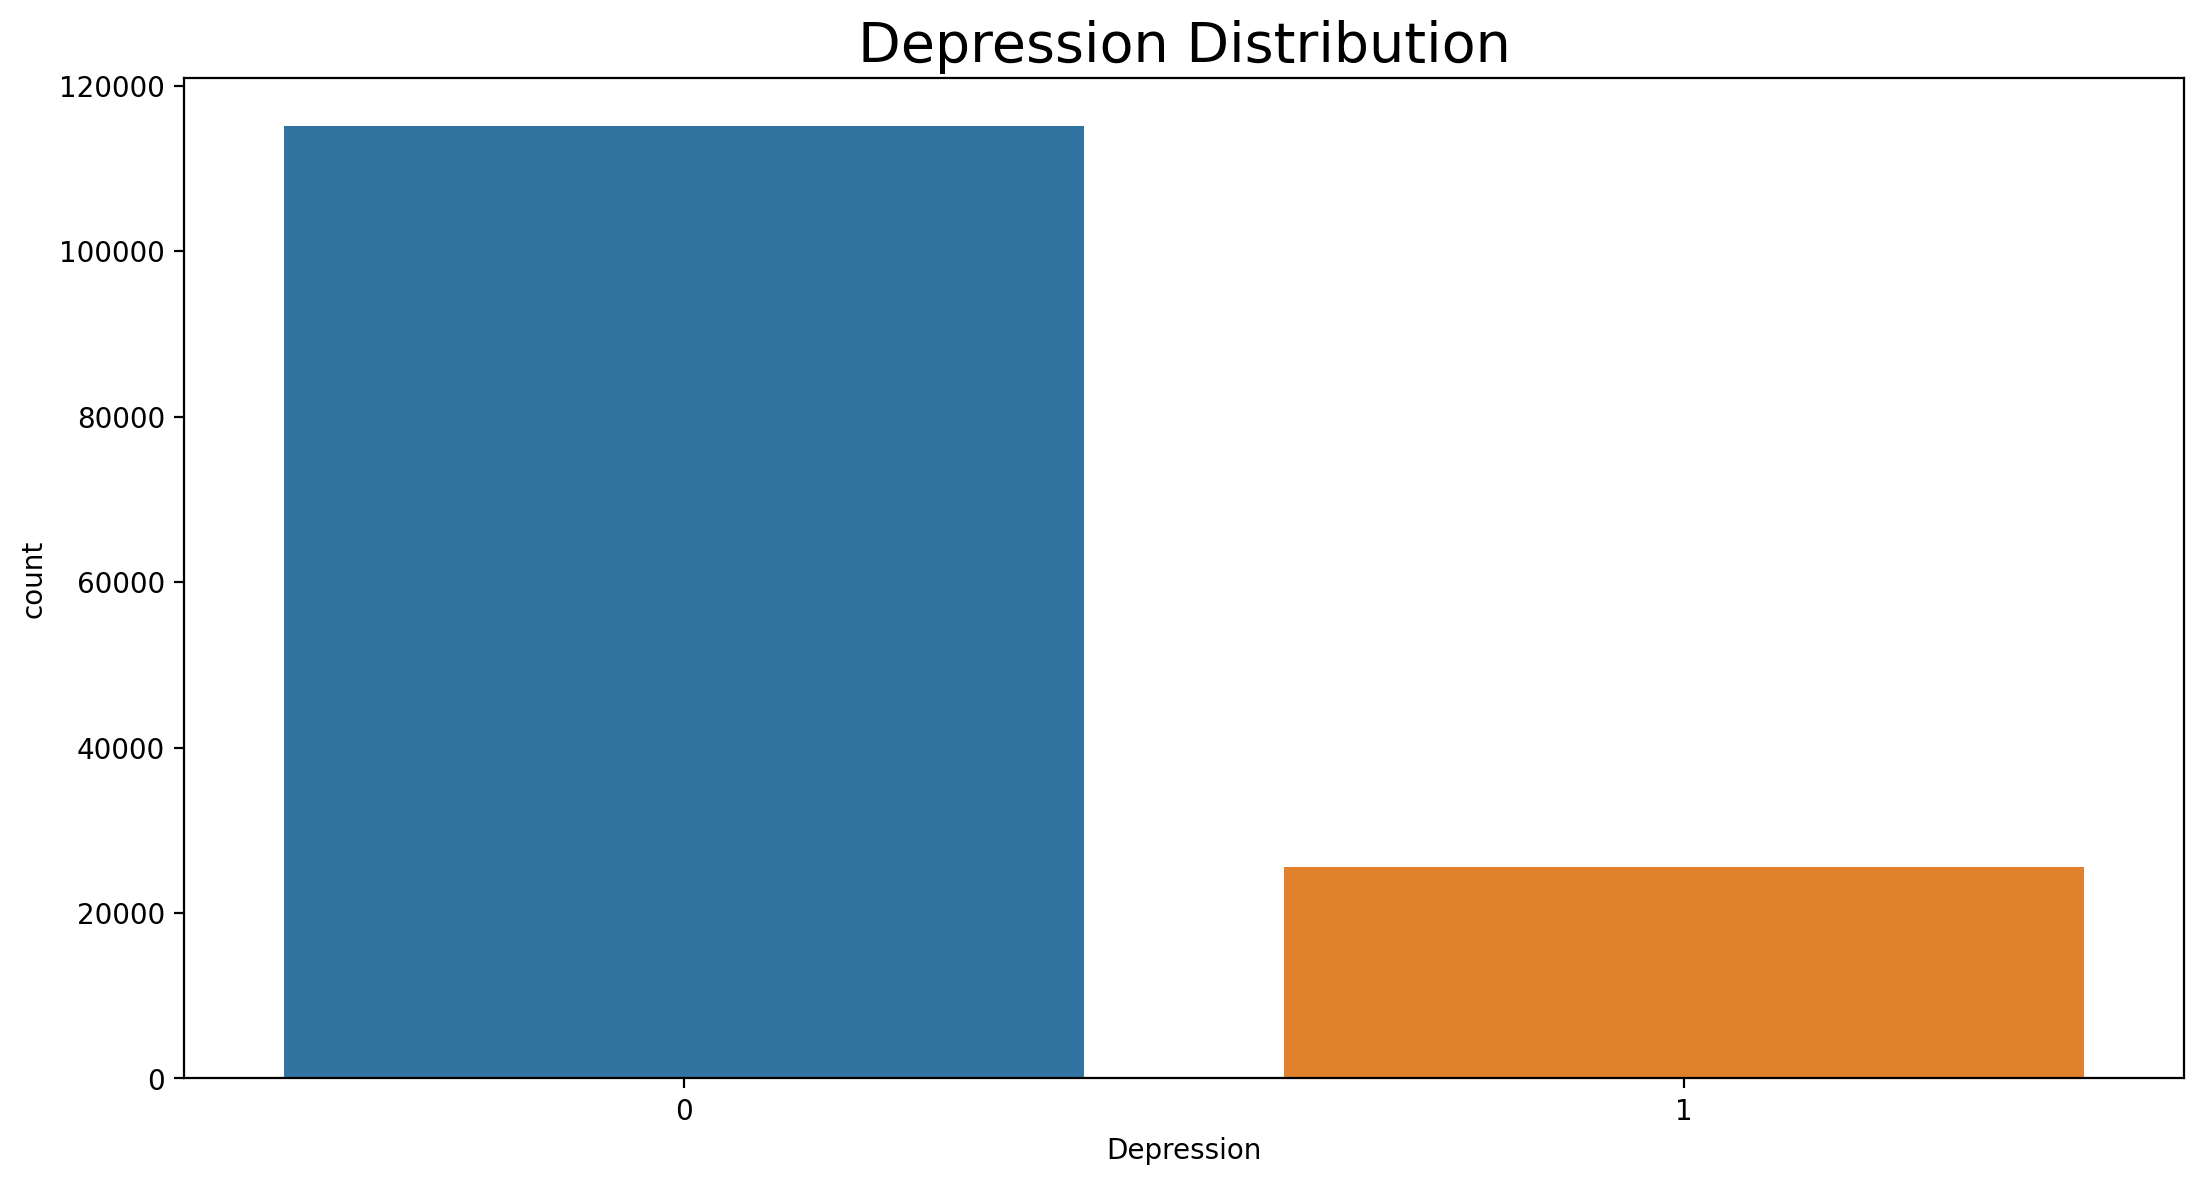

In [19]:
fig = plt.figure(figsize=(10,5),dpi=200)
ax = fig.add_axes([0,0,1,1])

sns.countplot(data = df,
              x = 'Depression')

# Add a title
ax.set_title('Depression Distribution',fontsize = 20,loc = 'Center')
;

The target variable **Depression** has an imbalanced class distribution, with 115,133 instances of "0" (no depression) and 25,567 instances of "1" (depressed). This imbalance could lead to biased model performance, so techniques like oversampling, undersampling, or using class weights might be helpful for training.

#### Visualizing the relationship between the target and predictors

In [23]:
df.rename(columns={'Working Professional or Student': 'Professional_Student',
                  'Have you ever had suicidal thoughts ?': 'suicidal',
                  'Work/Study Hours': 'Work_Study_Hours',
                  'Family History of Mental Illness': 'Family_History'}, inplace=True)

''

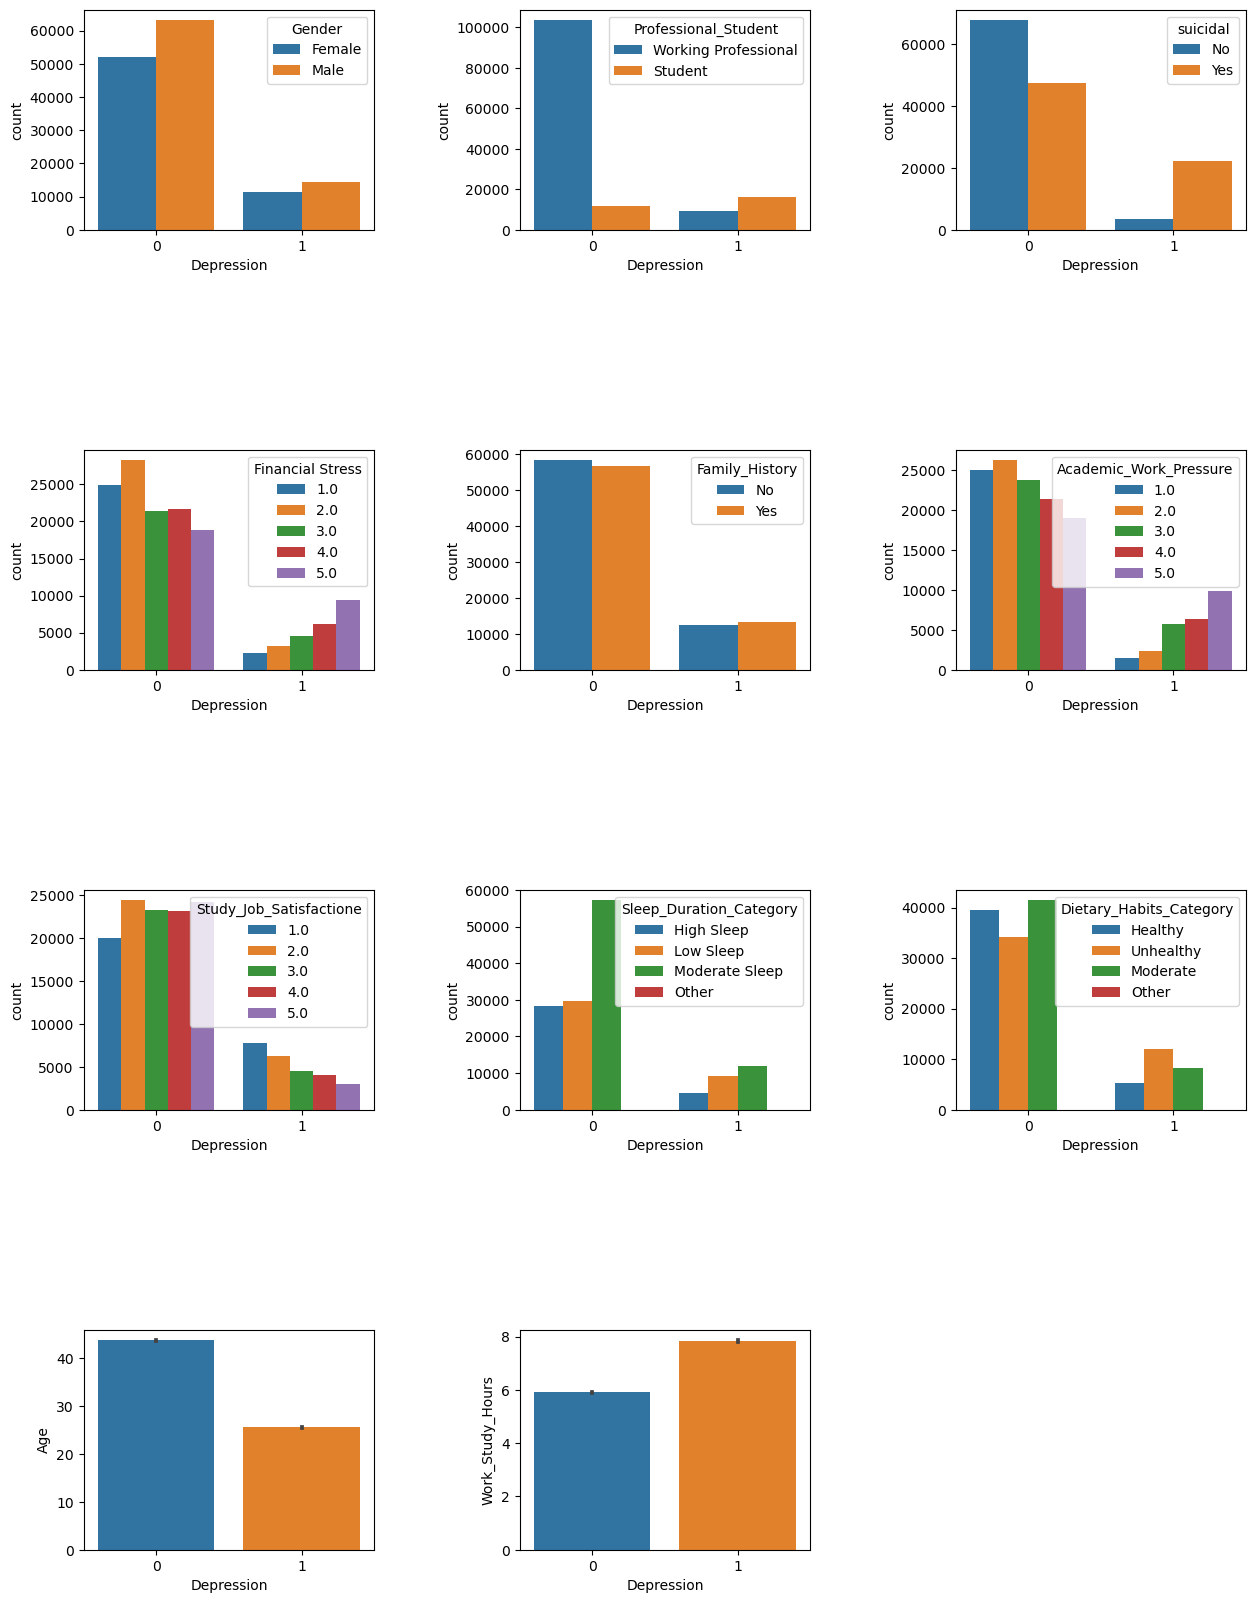

<Figure size 2000x1000 with 0 Axes>

In [31]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (15, 20))

plt.subplots_adjust(hspace = 1, wspace = 0.5)


plt.figure(figsize=(10,5),dpi=200)

sns.countplot(data = df,
              x = 'Depression',
              hue = 'Gender',
              ax = axes[0,0])

sns.countplot(data = df,
              x = 'Depression',
              hue = 'Professional_Student',
             ax = axes[0,1])

sns.countplot(data = df,
              x = 'Depression',
              hue = 'suicidal',
              ax = axes[0,2])

sns.countplot(data = df,
              x = 'Depression',
              hue = 'Financial Stress',
              ax = axes[1,0])

sns.countplot(data = df,
              x = 'Depression',
              hue = 'Family_History',
              ax = axes[1,1])

sns.countplot(data = df,
              x = 'Depression',
              hue = 'Academic_Work_Pressure',
              ax = axes[1,2])

sns.countplot(data = df,
              x = 'Depression',
              hue = 'Study_Job_Satisfactione',
              ax = axes[2,0])

sns.countplot(data = df,
              x = 'Depression',
              hue = 'Sleep_Duration_Category',
              ax = axes[2,1])

sns.countplot(data = df,
              x = 'Depression',
              hue = 'Dietary_Habits_Category',
              ax = axes[2,2])

sns.barplot(data = df,
              x = 'Depression',
              y = 'Age',
              ax = axes[3,0])

sns.barplot(data = df,
              x = 'Depression',
              y = 'Work_Study_Hours',
              ax = axes[3,1])

# Turn off the subplot at position (3, 2)
axes[3, 2].axis('off')
    
plt.tight_layout()
;


These visualizations collectively highlight the relationships between demographic, lifestyle, psychological factors, and **Depression**:

* **Gender, Professional/Student Status, and Suicidal Thoughts**: Higher rates of depression are observed among males, students, and individuals who have experienced suicidal thoughts, indicating that these factors could significantly influence mental health outcomes.

* **Financial Stress, Academic/Work Pressure, and Job Satisfaction**: Increased financial stress, higher academic/work pressure, and lower job satisfaction correlate with a greater likelihood of depression. These patterns suggest that economic and workload pressures are substantial stressors.

* **Sleep and Dietary Habits**: Individuals with moderate or low sleep and unhealthy dietary habits are more likely to be depressed, implying that lifestyle habits impact mental health.

* **Age and Work/Study Hours**: Those with depression tend to be younger and report higher work/study hours on average, suggesting that younger individuals under heavy workload may be at a higher risk of depression.

* **Family History of Mental Illness**: Depression is slightly more prevalent among those with a family history of mental illness, but the effect is moderate. This suggests family history might contribute to depression risk but is not a sole predictor.

### Hypothesis Testing

* The null hypothesis (H₀) assumes no association or no difference.
* The alternative hypothesis (H₁) suggests an association or difference exists.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Gender                   140700 non-null  object 
 1   Age                      140700 non-null  float64
 2   Professional_Student     140700 non-null  object 
 3   suicidal                 140700 non-null  object 
 4   Work_Study_Hours         140700 non-null  float64
 5   Financial Stress         140696 non-null  float64
 6   Family_History           140700 non-null  object 
 7   Depression               140700 non-null  int64  
 8   Academic_Work_Pressure   140679 non-null  float64
 9   Study_Job_Satisfactione  140685 non-null  float64
 10  Sleep_Duration_Category  140700 non-null  object 
 11  Dietary_Habits_Category  140700 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 12.9+ MB


Index(['Gender', 'Age', 'Professional_Student', 'suicidal', 'Work_Study_Hours',
       'Financial Stress', 'Family_History', 'Depression',
       'Academic_Work_Pressure', 'Study_Job_Satisfactione',
       'Sleep_Duration_Category', 'Dietary_Habits_Category'],
      dtype='object')

In [39]:
cat_cols = ['Gender', 'Professional_Student', 'suicidal','Financial Stress', 
            'Family_History', 'Academic_Work_Pressure', 'Study_Job_Satisfactione', 
            'Sleep_Duration_Category', 'Dietary_Habits_Category']

num_cols = ['Age', 'Work_Study_Hours']

target = 'Depression'

### Chi-Square Test for Categorical Features

The Chi-Square Test of Independence is used to test if there’s an association between two categorical variables. It’s particularly useful for checking if a feature is related to the target variable

In [41]:
# Chi-Square Test for each categorical feature
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Feature: {col}")
    print("  Chi-Square Statistic:", chi2)
    print("  p-value:", p)
    print("  Degree of freedom:", dof)
    if p < 0.05:
        print(f"  -> Significant association with {target}")
    else:
        print(f"  -> No significant association with {target}")
    print("------")

Feature: Gender
  Chi-Square Statistic: 9.289548293527956
  p-value: 0.0023046498245997494
  Degree of freedom: 1
  -> Significant association with Depression
------
Feature: Professional_Student
  Chi-Square Statistic: 38157.58582778027
  p-value: 0.0
  Degree of freedom: 1
  -> Significant association with Depression
------
Feature: suicidal
  Chi-Square Statistic: 17142.05535807986
  p-value: 0.0
  Degree of freedom: 1
  -> Significant association with Depression
------
Feature: Financial Stress
  Chi-Square Statistic: 7728.195132162486
  p-value: 0.0
  Degree of freedom: 4
  -> Significant association with Depression
------
Feature: Family_History
  Chi-Square Statistic: 38.22732530289218
  p-value: 6.296449268433189e-10
  Degree of freedom: 1
  -> Significant association with Depression
------
Feature: Academic_Work_Pressure
  Chi-Square Statistic: 10159.710045343953
  p-value: 0.0
  Degree of freedom: 4
  -> Significant association with Depression
------
Feature: Study_Job_Satisf

All features show a significant association with **Depression**, but **Academic_Work_Pressure** has a much higher chi-square statistic than **Study_Job_Satisfactione**. Since these two may be correlated, I’ll drop Study_Job_Satisfactione and keep **Academic_Work_Pressure** due to its stronger association with the target.

### ANOVA for Continuous Features

ANOVA is used to compare the means of a continuous feature across different categories of a categorical variable (like Target Feature) to see if the mean differs significantly between categories.

In [42]:
for col in num_cols:
    # Split the feature values based on the target categories
    groups = [df[df[target] == category][col] for category in df[target].unique()]
    
    # Perform ANOVA
    f_stat, p = f_oneway(*groups)
    print(f"Feature: {col}")
    print("  F-Statistic:", f_stat)
    print("  p-value:", p)
    if p < 0.05:
        print(f"  -> Significant difference in means across {target}")
    else:
        print(f"  -> No significant difference in means across {target}")
    print("------")

Feature: Age
  F-Statistic: 65862.57946791122
  p-value: 0.0
  -> Significant difference in means across Depression
------
Feature: Work_Study_Hours
  F-Statistic: 5370.440440987415
  p-value: 0.0
  -> Significant difference in means across Depression
------
